### Team members

##### Chirag Bhuvaneshwara
* 2571703
* s8chbhuv@stud.uni-saarland.de

##### Priyasha Chatterjee 
* 2572739
* s8prchat@stud.uni-saarland.de

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
from numpy.linalg import inv
import sounddevice as sd
from scipy.io import wavfile

In [2]:
_, noise1 = wavfile.read('data/noise1.wav')
_, noise2 = wavfile.read('data/noise2.wav')
_, noise3 = wavfile.read('data/noise3.wav')
_, noise4 = wavfile.read('data/noise4.wav')
_, noise5 = wavfile.read('data/noise5.wav')

In [3]:
noise1_fft = np.fft.fft(noise1)
noise2_fft = np.fft.fft(noise2)
noise3_fft = np.fft.fft(noise3)
noise4_fft = np.fft.fft(noise4)
noise5_fft = np.fft.fft(noise5)

In [4]:
def firstOrderFilter(noiseFftSignal):
    
    noiseFftSignal = np.insert(noiseFftSignal, 0, noiseFftSignal[0])
    
    filteredSignal = np.zeros(len(noiseFftSignal))
    for i in range(1, len(noiseFftSignal)):
        filteredSignal[i] = (.8 * abs(noiseFftSignal[i-1])) + (.2*abs(noiseFftSignal[i]))
        
    filteredSignal = np.delete(filteredSignal, 0)
    
    return filteredSignal

In [5]:
noise1_filtered = firstOrderFilter(noise1_fft)
noise2_filtered = firstOrderFilter(noise2_fft)
noise3_filtered = firstOrderFilter(noise3_fft)
noise4_filtered = firstOrderFilter(noise4_fft)
noise5_filtered = firstOrderFilter(noise5_fft)

In [6]:
final_noise_estimate = (1/5)*( noise1_filtered
                              +noise2_filtered
                              +noise3_filtered
                              +noise4_filtered
                              +noise5_filtered)

In [7]:
_, noisySignal = wavfile.read('data/noisy_sound.wav')
noisySignal_fft = np.fft.fft(noisySignal)

In [8]:
denoisedSignal_fft = noisySignal_fft -  final_noise_estimate

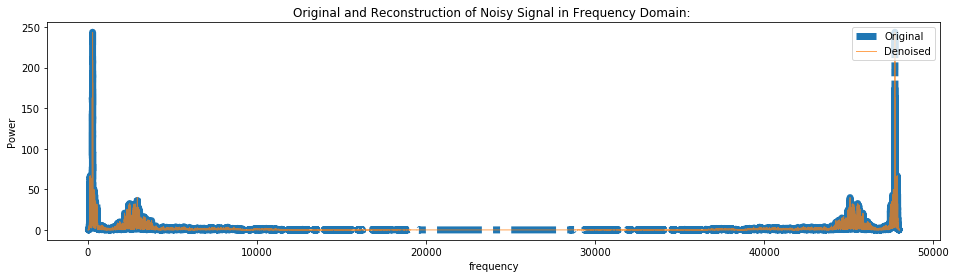

In [15]:
fig=plt.figure(figsize=(16, 4))

columns = 1
rows = 1

ax1 = plt.subplot(rows, columns, 1)
ax1.set_title("Original and Reconstruction of Noisy Signal in Frequency Domain: ")
ax1.plot(np.abs(noisySignal_fft), linestyle="dashdot", label = "Original", linewidth = 7)
ax1.plot(np.abs(denoisedSignal_fft), label="Denoised", alpha = 0.7, linewidth = 1)
ax1.legend(loc="upper right")
plt.xlabel('frequency')
plt.ylabel('Power')
plt.show()

In [13]:
denoisedSignal = np.fft.ifft(denoisedSignal_fft)

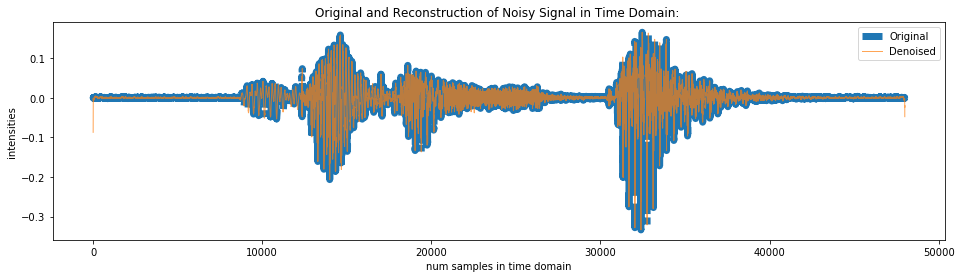

In [14]:
fig=plt.figure(figsize=(16, 4))

columns = 1
rows = 1

ax1 = plt.subplot(rows, columns, 1)
ax1.set_title("Original and Reconstruction of Noisy Signal in Time Domain: ")
ax1.plot(noisySignal, linestyle="dashdot", label = "Original", linewidth = 7)
ax1.plot(denoisedSignal, label="Denoised", alpha = 0.7, linewidth = 1)
ax1.legend(loc="upper right")
plt.xlabel('num samples in time domain')
plt.ylabel('intensities')
plt.show()